## Download trained model

In [6]:
!wget --output-document mobilenet_v3_large_100_224_feature_vector_v5.tar.gz "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5?tf-hub-format=compressed"

--2022-01-29 14:02:50--  https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5?tf-hub-format=compressed
tfhub.dev (tfhub.dev) をDNSに問いあわせています... 216.58.197.238
tfhub.dev (tfhub.dev)|216.58.197.238|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 302 Found
場所: https://storage.googleapis.com/tfhub-modules/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5.tar.gz [続く]
--2022-01-29 14:02:51--  https://storage.googleapis.com/tfhub-modules/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5.tar.gz
storage.googleapis.com (storage.googleapis.com) をDNSに問いあわせています... 172.217.175.48, 172.217.175.112, 142.250.196.144, ...
storage.googleapis.com (storage.googleapis.com)|172.217.175.48|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 15840597 (15M) [application/octet-stream]
`mobilenet_v3_large_100_224_feature_vector_v5.tar.gz' に保存中

mobilenet_v3_large_ 100%[===================>]  15.11M  12.8MB/s 時間 1.2s       

2022-01-29 14:02:53

In [7]:
!sha1sum mobilenet_v3_large_100_224_feature_vector_v5.tar.gz

b4181065be4258956e249ea56e27cbeb8306372b  mobilenet_v3_large_100_224_feature_vector_v5.tar.gz


In [8]:
!mkdir mobilenet_v3_large_100_224_feature_vector_v5

mkdir: mobilenet_v3_large_100_224_feature_vector_v5: File exists


In [9]:
!tar xvf mobilenet_v3_large_100_224_feature_vector_v5.tar.gz -C mobilenet_v3_large_100_224_feature_vector_v5

x ./
x ./variables/
x ./variables/variables.index
x ./variables/variables.data-00000-of-00001
x ./saved_model.pb
x ./assets/


## Convert to ONNX format

In [1]:
!pip install --user tensorflow

     |████████████████████████████████| 207.1 MB 3.9 MB/s eta 0:00:013     |███████████████████████████████▌| 203.8 MB 3.7 MB/s eta 0:00:01
  Using cached tensorboard-2.8.0-py3-none-any.whl (5.8 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached flatbuffers-2.0-py2.py3-none-any.whl (26 kB)
  Using cached keras-2.7.0-py2.py3-none-any.whl (1.3 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorflow_estimator-2.7.0-py2.py3-none-any.whl (463 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
     |████████████████████████████████| 1.6 MB 4.4 MB/s eta 0:00:01
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached libclang-13.0.0-py2.py3-none-macosx_10_9_x86_64.whl (13.0 MB)
  Using cached tensorboard_data_server-0.6.1-py3-none-macosx_10_9_

In [2]:
!pip install onnxruntime

     |████████████████████████████████| 5.4 MB 3.1 MB/s eta 0:00:01
You should consider upgrading via the '/Users/masatani/.pyenv/versions/3.9.5/bin/python3.9 -m pip install --upgrade pip' command.


In [3]:
pip install -U tf2onnx

  Using cached tf2onnx-1.9.3-py3-none-any.whl (435 kB)
     |████████████████████████████████| 12.1 MB 9.7 MB/s eta 0:00:01
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 2.0
    Uninstalling flatbuffers-2.0:
      Successfully uninstalled flatbuffers-2.0
You should consider upgrading via the '/Users/masatani/.pyenv/versions/3.9.5/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
!python -m tf2onnx.convert --saved-model mobilenet_v3_large_100_224_feature_vector_v5 --output mobilenet_v3_large_100_224_feature_vector_v5.onnx

/Users/masatani/.pyenv/versions/3.9.5/lib/python3.9/runpy.py:127: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2022-01-29 14:16:17,997 - WARNING - '--tag' not specified for saved_model. Using --tag serve
2022-01-29 14:16:19,909 - INFO - Signatures found in model: [serving_default].
2022-01-29 14:16:19,909 - WARNING - '--signature_def' not specified, using first signature: serving_default
2022-01-29 14:16:19,912 - INFO - Output names: ['feature_vector']
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
2022-01-29 14:16:22,332 - WARNING - From /Users/masatani/.pyenv/versions/3.9.5/lib/python3.9/site-packages/tf2onnx/tf_loader.py:706: extract_sub_graph (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.graph

## Infer the model for test

In [28]:
import numpy as np
import onnxruntime
import os

In [29]:
onnxruntime.get_device()

'CPU'

In [30]:
model_path = os.path.abspath("./mobilenet_v3_large_100_224_feature_vector_v5.onnx")

In [31]:
session = onnxruntime.InferenceSession(model_path)

In [32]:
session.get_inputs()[0].name

'inputs'

In [33]:
session.run(["feature_vector"], {"inputs": np.zeros((1, 224, 224, 3), dtype=np.float32)})

[array([[-0.19617277, -0.32971096,  0.01838616, ...,  1.1617084 ,
         -0.36636534, -0.33906442]], dtype=float32)]

In [34]:
session.run(["feature_vector"], {"inputs": np.ones((1, 224, 224, 3), dtype=np.float32)})

[array([[ 0.4693332 ,  0.20881288,  0.30621248, ..., -0.36716673,
         -0.31486627, -0.33280432]], dtype=float32)]

## Download and output images

In [23]:
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

--2022-01-29 14:36:22--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
www.cs.toronto.edu (www.cs.toronto.edu) をDNSに問いあわせています... 128.100.3.30
www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 170498071 (163M) [application/x-gzip]
`cifar-10-python.tar.gz' に保存中

cifar-10-python.tar 100%[===================>] 162.60M  8.60MB/s 時間 27s        

2022-01-29 14:36:50 (6.03 MB/s) - `cifar-10-python.tar.gz' へ保存完了 [170498071/170498071]



In [24]:
!mkdir cifar-10

In [25]:
!tar xvf cifar-10-python.tar.gz -C cifar-10

x cifar-10-batches-py/
x cifar-10-batches-py/data_batch_4
x cifar-10-batches-py/readme.html
x cifar-10-batches-py/test_batch
x cifar-10-batches-py/data_batch_3
x cifar-10-batches-py/batches.meta
x cifar-10-batches-py/data_batch_2
x cifar-10-batches-py/data_batch_5
x cifar-10-batches-py/data_batch_1


In [26]:
!mkdir cifar-10/insert cifar-10/search

In [91]:
!ls cifar-10/cifar-10-batches-py

batches.meta data_batch_2 data_batch_4 readme.html
data_batch_1 data_batch_3 data_batch_5 test_batch


In [9]:
import pickle
from PIL import Image
import os

In [10]:
base_path = os.path.abspath('cifar-10')

In [14]:
def data_to_image(data_path, img_path):
    with open(data_path, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
        for i in range(len(dict[b'labels'])):
            out_path = img_path + '/' + dict[b'filenames'][i].decode()
            data = dict[b'data'][i].reshape(3, 32, 32).transpose(1, 2, 0) # shape=(32, 32, 3)
            img = Image.fromarray(data, 'RGB')
            img.save(out_path)

In [15]:
insert_img_path = base_path + '/insert'
insert_file_list = ['data_batch_1', 'data_batch_2', 'data_batch_3',  'data_batch_4',  'data_batch_5']
for file in insert_file_list:
    insert_data_path = base_path + '/cifar-10-batches-py/' + file
    data_to_image(insert_data_path, insert_img_path)

In [16]:
search_img_path = base_path + '/search'
search_data_path = base_path + '/cifar-10-batches-py/' + 'test_batch'
data_to_image(search_data_path, search_img_path)

## Extract feature vectors from images for inserting

In [40]:
import glob
import numpy as np

In [26]:
insert_img_paths = glob.glob(insert_img_path + '/*.png')

In [35]:
onnx_session = onnxruntime.InferenceSession(model_path)

In [61]:
insert_features_path = insert_img_path + '/features.npy'
features = np.array([])
for image_path in insert_img_paths:
    img = Image.open(image_path)
    img = img.convert("RGB")
    img = img.resize((224, 224))
    img = np.array(img, dtype=np.float32)
    img = img / 255

    feature_vector = onnx_session.run(["feature_vector"], {"inputs": np.expand_dims(img, 0)})[0][0]
    feature = {
        'path': image_path,
        'vector': feature_vector
    }
    features = np.append(features, np.array(feature))

np.save(insert_features_path, features)

## Search similar images by query image

In [258]:
import numpy as np
import glob
import onnxruntime
from PIL import Image
import matplotlib.pyplot as plt

In [259]:
%matplotlib inline 

### Query image 1

In [261]:
search_img_paths = glob.glob(search_img_path + '/*.png')
test_img_path = search_img_paths[0]

In [262]:
def open_image(path):
    img = Image.open(test_img_path)
    img = img.convert("RGB")
    img = img.resize((224, 224))
    img = np.array(img, dtype=np.float32)
    img = img / 255

    return img

In [263]:
img = open_image(test_img_path)

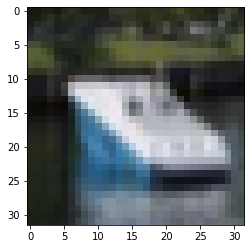

In [264]:
plt.imshow(mpimg.imread(test_img_path),cmap="gray")

In [265]:
onnx_session = onnxruntime.InferenceSession(model_path)

In [266]:
query_feature = onnx_session.run(
    ["feature_vector"], {"inputs": np.expand_dims(img, 0)}
)[0][0]

### Similar images of the result

In [267]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [268]:
n_search = 10

In [269]:
insert_features = np.load(insert_features_path, allow_pickle=True)

In [270]:
query_features = np.tile(query_feature, (len(features), 1))

In [271]:
distances = np.linalg.norm(query_features - list(map(lambda x: x['vector'], insert_features)), axis=1)

In [272]:
distance_indexes = np.argsort(distances)[:n_search]

In [273]:
results = []
for idx in distance_indexes:
    distance = distances[idx]
    result_img_path = insert_features[idx]['path']
    results.append({
        'path': result_img_path,
        'distance': distance,
    })

top: 1, distance: 18.420196533203125


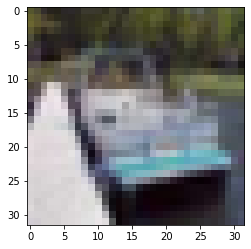

top: 2, distance: 18.532560348510742


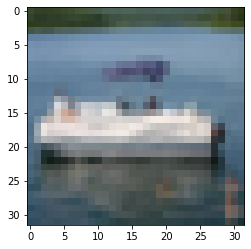

top: 3, distance: 18.603309631347656


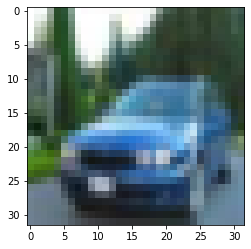

top: 4, distance: 18.671796798706055


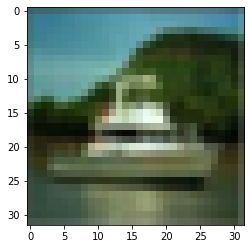

top: 5, distance: 18.964900970458984


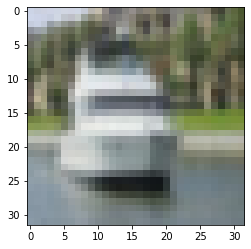

top: 6, distance: 18.995800018310547


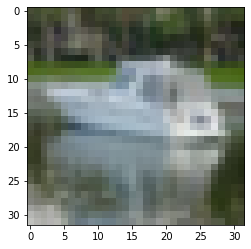

top: 7, distance: 19.044078826904297


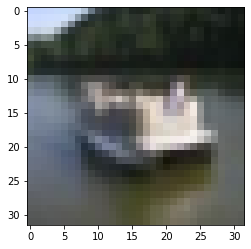

top: 8, distance: 19.21797752380371


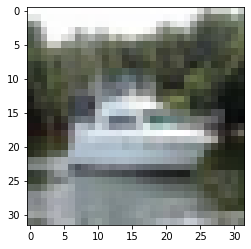

top: 9, distance: 19.294734954833984


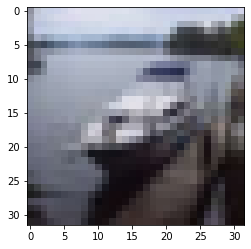

top: 10, distance: 19.32024383544922


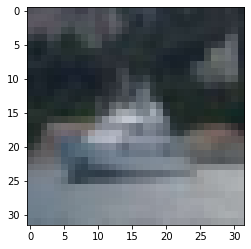

In [274]:
from matplotlib import pyplot
for i, result in enumerate(results):
    print("top: {0}, distance: {1}".format(i + 1, result['distance']))
    image = Image.open(result['path'])
    pyplot.imshow(image)
    pyplot.show()

### Query image 2

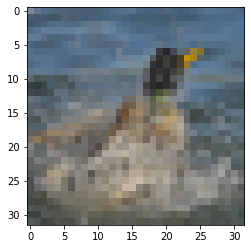

In [284]:
test_img_path = search_img_paths[100]
img = open_image(test_img_path)
plt.imshow(mpimg.imread(test_img_path),cmap="gray")

In [285]:
onnx_session = onnxruntime.InferenceSession(model_path)
query_feature = onnx_session.run(
    ["feature_vector"], {"inputs": np.expand_dims(img, 0)}
)[0][0]

In [286]:
n_search = 10

In [287]:
insert_features = np.load(insert_features_path, allow_pickle=True)
query_features = np.tile(query_feature, (len(features), 1))

In [288]:
distances = np.linalg.norm(query_features - list(map(lambda x: x['vector'], insert_features)), axis=1)
distance_indexes = np.argsort(distances)[:n_search]

In [289]:
results = []
for idx in distance_indexes:
    distance = distances[idx]
    result_img_path = insert_features[idx]['path']
    results.append({
        'path': result_img_path,
        'distance': distance,
    })

top: 1, distance: 17.038734436035156


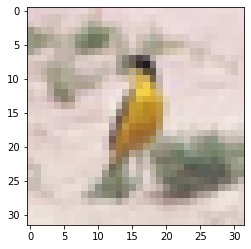

top: 2, distance: 17.46709632873535


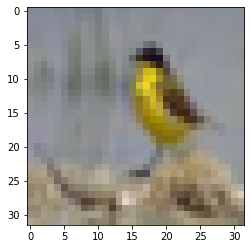

top: 3, distance: 18.30060577392578


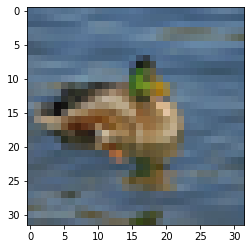

top: 4, distance: 18.326507568359375


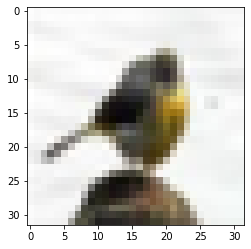

top: 5, distance: 18.546405792236328


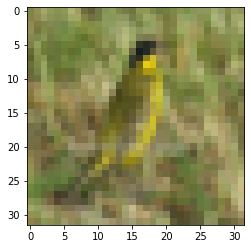

top: 6, distance: 18.736148834228516


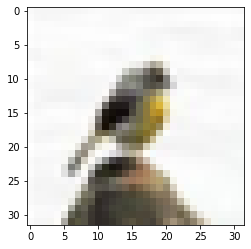

top: 7, distance: 18.823379516601562


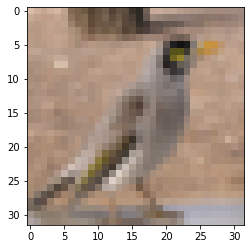

top: 8, distance: 18.870641708374023


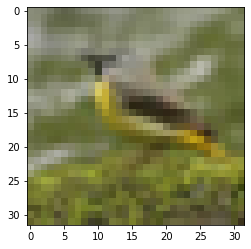

top: 9, distance: 19.044538497924805


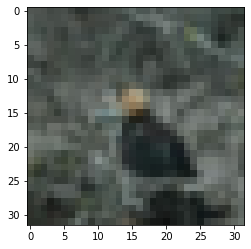

top: 10, distance: 19.27358627319336


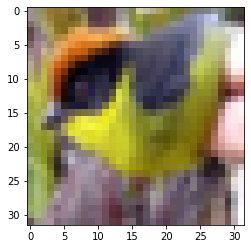

In [290]:
for i, result in enumerate(results):
    print("top: {0}, distance: {1}".format(i + 1, result['distance']))
    image = Image.open(result['path'])
    pyplot.imshow(image)
    pyplot.show()